### Introduction to Convolution Neural Networks - Assignment
#### by Gaurav Singh (grv08singh@gmail.com)

In [1]:
import numpy as np
import pandas as pd

import json
import os
from pathlib import Path
from kaggle.api.kaggle_api_extended import KaggleApi

from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

import cv2

import warnings
warnings.filterwarnings('ignore')

### Problem Statement:
The task at hand involves classifying images of cats and dogs using a Convolutional Neural Network (CNN). We have a dataset containing images of cats and dogs and the objective is to train a CNN model to accurately predict the class of each image.

### Objectives:

#### Data Preparation:
* Download and extract the cats vs. dogs dataset.
* Organize the dataset into a structured directory format suitable for TensorFlow’s ImageDataGenerator.

#downloading data from kaggle.
kaggle_json_path = Path.home() / ".kaggle" / "kaggle.json"
with open(kaggle_json_path, "r") as f:
    creds = json.load(f)

os.environ["KAGGLE_USERNAME"] = creds["username"]
os.environ["KAGGLE_KEY"] = creds["key"]

api = KaggleApi()
api.authenticate()

dataset_slug = 'salader/dogsvscats'           #kaggle dataset online path
download_path = 'D:/Downloads/data'           #local machine download path
api.dataset_download_files(dataset=dataset_slug, path=download_path, unzip=True)

* Split the dataset into training and testing sets.

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/Downloads/data/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = 'D:/Downloads/data/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#### Data Augmentation and Preprocessing:
* Implement data augmentation techniques to increase the diversity of the training dataset, aiding in the model's ability to generalize.
* Normalize the pixel values of the images for optimal model performance.

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range = 30,
    rescale = 1/255,
    shear_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1/255)

batch_size = 16
train_generator = train_datagen.flow_from_directory(
    directory = 'D:/Downloads/data/train',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory(
    directory = 'D:/Downloads/data/test',
    target_size = (256,256),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


#### Model Building:
* Construct a Convolutional Neural Network using TensorFlow and Keras.
* The model should contain multiple convolutional layers, pooling layers, and fully connected layers.

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,722,945 (14.20 MB)

 Trainable params: 3,722,753 (14.20 MB)

 Non-trainable params: 192 (768.00 B)

#### Training:
* Compile the model and train it on the prepared dataset.
* Utilize binary cross entropy as the loss function and stochastic gradient descent as the optimizer.
* Train the model for a sufficient number of epochs to achieve good performance.
#### Evaluation:
* Evaluate the model's performance on the validation set during training to monitor for overfitting.
* After training, assess the model's accuracy and make predictions on the test set.

In [5]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = len(train_generator),
    validation_data = test_generator,
    validation_steps=len(test_generator),
    epochs = 100
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 817s 652ms/step - accuracy: 0.6219 - loss: 0.6619 - val_accuracy: 0.6970 - val_loss: 0.5789
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 548s 438ms/step - accuracy: 0.6641 - loss: 0.6006 - val_accuracy: 0.6274 - val_loss: 0.6252
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 559s 447ms/step - accuracy: 0.6908 - loss: 0.5777 - val_accuracy: 0.6740 - val_loss: 0.6007
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 551s 440ms/step - accuracy: 0.7104 - loss: 0.5578 - val_accuracy: 0.7340 - val_loss: 0.5274
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 553s 442ms/step - accuracy: 0.7244 - loss: 0.5399 - val_accuracy: 0.7720 - val_loss: 0.4778
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 559s 447ms/step - accuracy: 0.7394 - loss: 0.5220 - val_accuracy: 0.7700 - val_loss: 0.4715
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 554s 443ms/step - accuracy: 0.7430 - loss: 0.5183 - val_accuracy: 0.7612 - val_loss: 0.4889
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 564s 451ms/s

In [10]:
model.save("Cats_vs_Dogs_classifier.keras")

#### Prediction:
* Implement a system to make predictions on new images, categorizing them as either `cat` or `dog`.
* The system should be able to take an image (or a batch of images), preprocess it, and pass it through the model for prediction.

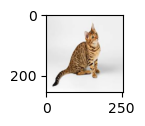

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: Cat with Confidence Level: 98.66%


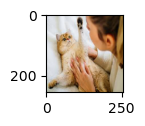

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted Class: Dog with Confidence Level: 92.78%


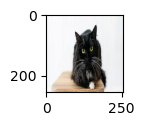

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Cat with Confidence Level: 99.98%


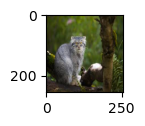

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: Dog with Confidence Level: 67.53%


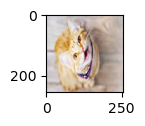

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Cat with Confidence Level: 70.70%


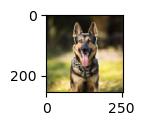

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Dog with Confidence Level: 99.95%


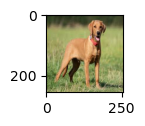

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Dog with Confidence Level: 100.00%


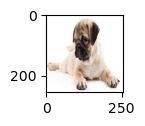

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Class: Dog with Confidence Level: 97.85%


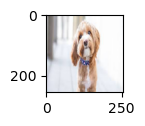

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: Dog with Confidence Level: 99.97%


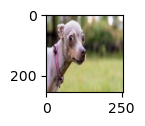

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: Dog with Confidence Level: 99.80%


In [25]:
#single image / image batch - prediction
#for single image - just give the path of the image in the list below
#for a batch of images - give the path of all the images separated by comma in the list below

paths = [
    "D:/Downloads/data/new_images/cat_1.jpg"
    ,"D:/Downloads/data/new_images/cat_2.jpg"
    ,"D:/Downloads/data/new_images/cat_3.jpg"
    ,"D:/Downloads/data/new_images/cat_4.jpg"
    ,"D:/Downloads/data/new_images/cat_5.jpg"
    ,"D:/Downloads/data/new_images/dog_1.jpg"
    ,"D:/Downloads/data/new_images/dog_2.jpg"
    ,"D:/Downloads/data/new_images/dog_3.jpg"
    ,"D:/Downloads/data/new_images/dog_4.jpg"
    ,"D:/Downloads/data/new_images/dog_5.jpg"
]

for image_path in paths:
    img = image.load_img(image_path, target_size=(256,256))
    plt.figure(figsize=(1,1))
    plt.imshow(img)
    plt.show()
    
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr_scaled = img_arr/255.
    
    prediction = model.predict(img_arr_scaled)
    confidence = prediction[0][0]
    
    if confidence > 0.5:
        class_name = 'Dog'
        confidence = confidence
    else:
        class_name = 'Cat'
        confidence = 1 - confidence
    
    print(f"Predicted Class: {class_name} with Confidence Level: {confidence:.2%}")